In [ ]:
!gdown 1e0elN9XOR_zjp34gseTOw-p3BTVdz_qB

Downloading...
From: https://drive.google.com/uc?id=1e0elN9XOR_zjp34gseTOw-p3BTVdz_qB
To: /content/Textblob_UKR.csv.zip
100% 318M/318M [00:04<00:00, 66.1MB/s]


In [ ]:
!unzip Textblob_UKR.csv.zip

Archive:  Textblob_UKR.csv.zip
  inflating: Textblob_UKR.csv        


In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('Textblob_UKR.csv')

In [ ]:
df.head(5)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,0,Text,LemmatizeText,Polarity,Sentiment_Label_Textblob
0,0,0,0,#pentagon - the #us will supply #ukraine with ...,the will supply with drones which allow you to...,the will supply with drone which allow you to ...,-0.083333,Negative
1,1,1,1,what a disgrace 100d of billions to putin to c...,what a disgrace d of billions to putin to comm...,what a disgrace d of billion to putin to commi...,0.000000,Neutral
2,2,2,2,murderers rapists and thieves “we were suppose...,murderers rapists and thieves we were supposed...,murderer rapist and thief we were supposed to ...,0.000000,Neutral
3,3,3,3,this is looking great on @joebiden @justintrud...,this is looking great on corruption with it s ...,this is looking great on corruption with it s ...,0.200000,Positive
4,4,4,4,@warriner_kev @anders_aslund following your li...,kev aslund following your line of argument the...,kev aslund following your line of argument the...,0.040000,Positive


In [ ]:
fourth_value = df.loc[4, '0']

In [ ]:
fourth_value

'@warriner_kev @anders_aslund following your line of argument:then us must give up base at guantanamo bay because this is really a danger for cubawhy would russia give up this strategic basewhich great (even: middle) power would do that uk franceserious answer please#ukraine #russia #crimea'

In [ ]:
value = df.loc[4, 'LemmatizeText']

In [ ]:
value

'kev aslund following your line of argument then u must give up base at guantanamo bay because this is really a danger for cubawhy would russia give up this strategic basewhich great even middle power would do that uk franceserious answer please#ukraine'

In [ ]:
unique_count = df['Sentiment_Label_Textblob'].nunique()
print("Number of unique values:", unique_count)

Number of unique values: 3


In [ ]:
category_counts = df['Sentiment_Label_Textblob'].value_counts()

In [ ]:
category_counts

Positive    1074157
Neutral      941213
Negative     686559
Name: Sentiment_Label_Textblob, dtype: int64

In [ ]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

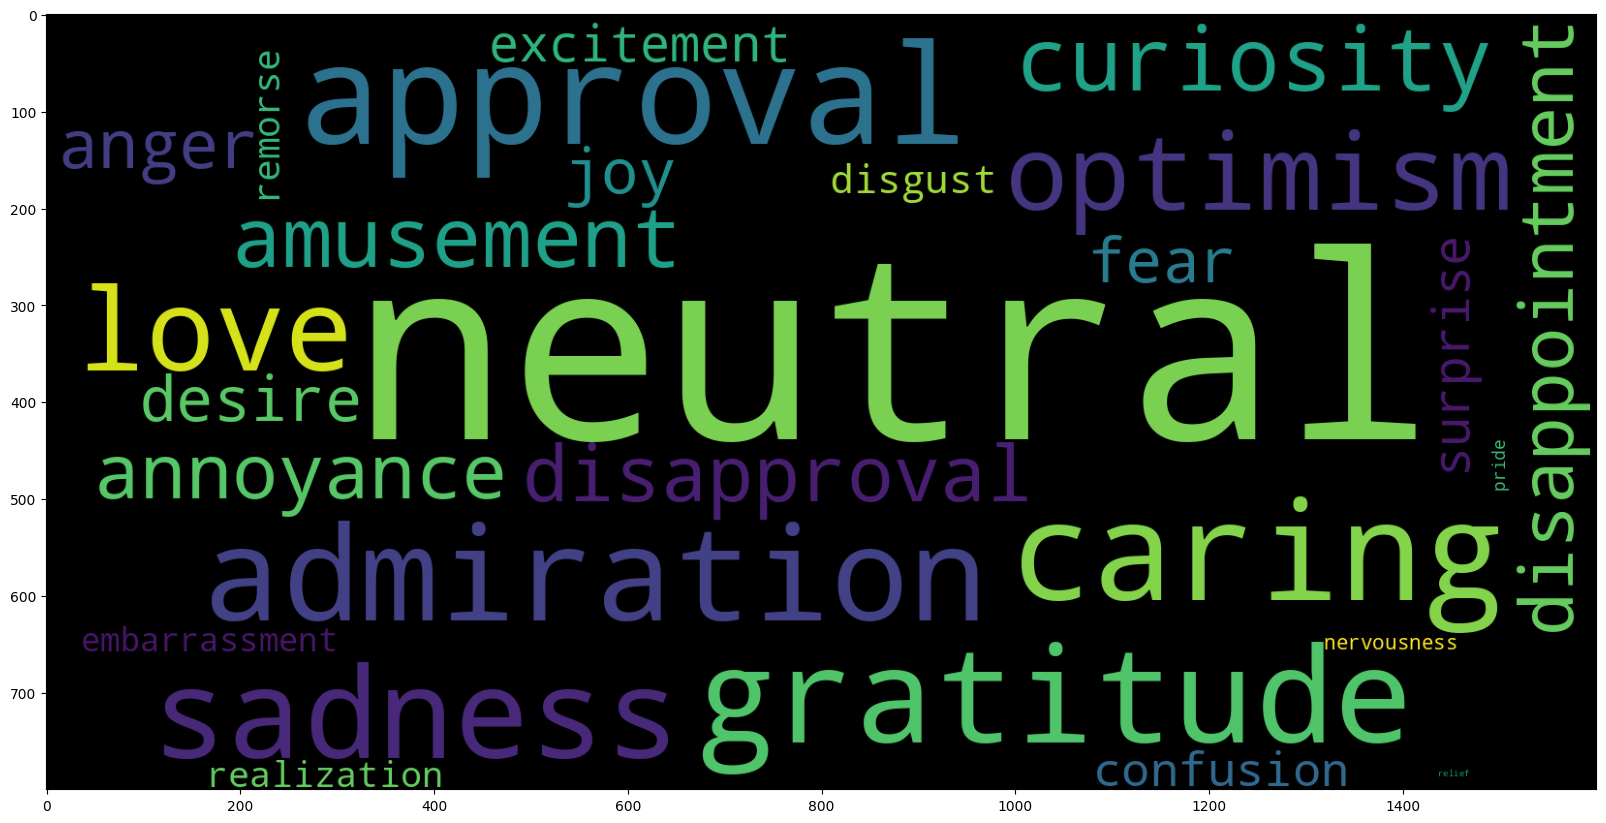

In [ ]:
data_neg = df['HuggingFaceEmoticon'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [ ]:
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
X=df.LemmatizeText
y=df.Sentiment_Label_Textblob

In [ ]:
X = df.LemmatizeText.fillna(' ')

In [ ]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state =0)

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  500000


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
X_train

<1891350x500000 sparse matrix of type '<class 'numpy.float64'>'
	with 66623724 stored elements in Compressed Sparse Row format>

In [ ]:
X_test

<810579x500000 sparse matrix of type '<class 'numpy.float64'>'
	with 28402965 stored elements in Compressed Sparse Row format>

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
y_pred1 = BNBmodel.predict(X_test)

In [ ]:
y_pred1

array(['Positive', 'Neutral', 'Neutral', ..., 'Neutral', 'Neutral',
       'Negative'], dtype='<U8')

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming 'y_test' contains the true target values
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.7687603552522333


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'y_test' contains the true target values and 'y_pred1' contains the predicted values
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred1)
print("Classification Report:\n", class_report)

Accuracy: 0.7687603552522333
Classification Report:
               precision    recall  f1-score   support

    Negative       0.72      0.72      0.72    206696
     Neutral       0.76      0.81      0.78    282035
    Positive       0.82      0.76      0.79    321848

    accuracy                           0.77    810579
   macro avg       0.76      0.76      0.76    810579
weighted avg       0.77      0.77      0.77    810579



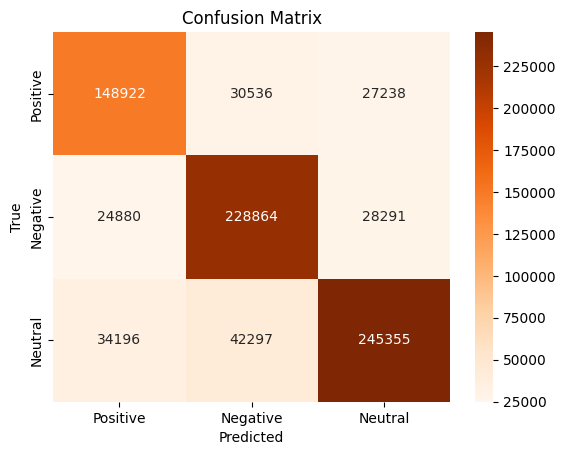

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd



# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)

# Define the labels for the confusion matrix
labels = ["Positive","Negative","Neutral"]

# Create the heatmap using seaborn
sns.heatmap(conf_matrix, annot=True, cmap="Oranges", fmt="d", xticklabels=labels, yticklabels=labels)

# Add labels and title to the plot
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Display the plot
plt.show()


In [ ]:
value = df.loc[10000, 'LemmatizeText']

In [ ]:
value

'new poll in austria who is to blame for the war in yes no usa yes no ukraine yes no belarus yes no nato yes no eu yes no do you support eu sanctionsyes no source'

In [ ]:
BNBmodel.predict(vectoriser.transform(['the terrorist and nazi pig of the regime trying to eliminate alexander dugin blew up his daughter in a car']))

array(['Negative'], dtype='<U8')

In [ ]:
BNBmodel.predict(vectoriser.transform(['lift the ban on russian medium and let people do their own thinking this level of censorship is ridiculous in the st century']))

In [ ]:
BNBmodel.predict(vectoriser.transform(['putain s greedy yenfor his russian greatness will cost the world dearly']))

array(['Neutral'], dtype='<U8')

In [ ]:
BNBmodel.predict(vectoriser.transform(['american actor kevin sorbo call to end financial aid for ukraine stop sending money to ukraine wrote actor on his twitteron august biden announced yet another million package of military aid for']))

array(['Negative'], dtype='<U8')

In [ ]:
BNBmodel.predict(vectoriser.transform(['new poll in austria who is to blame for the war in yes no usa yes no ukraine yes no belarus yes no nato yes no eu yes no do you support eu sanctionsyes no source']))

array(['Positive'], dtype='<U8')

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)

y_pred2 = SVCmodel.predict(X_test)

In [ ]:
y_pred2

array(['Positive', 'Negative', 'Neutral', ..., 'Neutral', 'Neutral',
       'Positive'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'y_test' contains the true target values and 'y_pred1' contains the predicted values
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred2)
print("Classification Report:\n", class_report)

Accuracy: 0.9672098586319162
Classification Report:
               precision    recall  f1-score   support

    Negative       0.95      0.95      0.95    206696
     Neutral       0.99      0.97      0.98    282035
    Positive       0.96      0.97      0.97    321848

    accuracy                           0.97    810579
   macro avg       0.97      0.97      0.97    810579
weighted avg       0.97      0.97      0.97    810579



In [ ]:
from sklearn.metrics import accuracy_score

# Assuming 'y_test' contains the true target values
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.9672098586319162


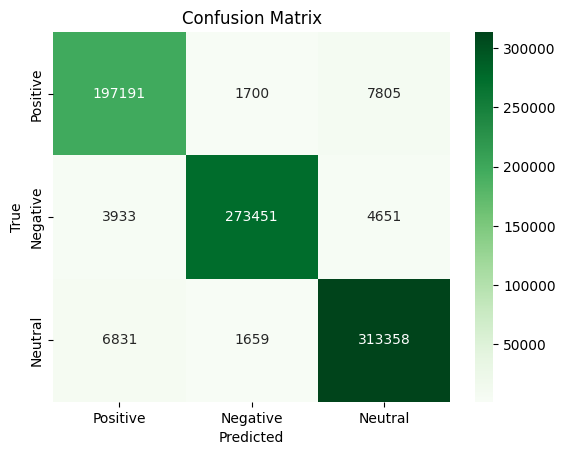

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd



# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)

# Define the labels for the confusion matrix
labels = ["Positive","Negative","Neutral"]

# Create the heatmap using seaborn
sns.heatmap(conf_matrix, annot=True, cmap="Greens", fmt="d", xticklabels=labels, yticklabels=labels)

# Add labels and title to the plot
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Display the plot
plt.show()


In [ ]:
SVCmodel.predict(vectoriser.transform(['the terrorist and nazi pig of the regime trying to eliminate alexander dugin blew up his daughter in a car']))

array(['Neutral'], dtype=object)

In [ ]:
SVCmodel.predict(vectoriser.transform(['lift the ban on russian medium and let people do their own thinking this level of censorship is ridiculous in the st century']))

array(['Positive'], dtype=object)

In [ ]:
SVCmodel.predict(vectoriser.transform(['putain s greedy yenfor his russian greatness will cost the world dearly']))

array(['Neutral'], dtype=object)

In [ ]:
SVCmodel.predict(vectoriser.transform(['american actor kevin sorbo call to end financial aid for ukraine stop sending money to ukraine wrote actor on his twitteron august biden announced yet another million package of military aid for']))

array(['Negative'], dtype=object)

In [ ]:
SVCmodel.predict(vectoriser.transform(['new poll in austria who is to blame for the war in yes no usa yes no ukraine yes no belarus yes no nato yes no eu yes no do you support eu sanctionsyes no source']))

array(['Positive'], dtype=object)

**Logistic Regression**

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)

y_pred3 = LRmodel.predict(X_test)

In [ ]:
y_pred3

array(['Positive', 'Negative', 'Neutral', ..., 'Neutral', 'Neutral',
       'Positive'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming 'y_test' contains the true target values
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)

Accuracy: 0.9619617582000027


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'y_test' contains the true target values and 'y_pred1' contains the predicted values
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred3)
print("Classification Report:\n", class_report)

Accuracy: 0.9619617582000027


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd



# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)

# Define the labels for the confusion matrix
labels = ["Positive","Negative","Neutral"]

# Create the heatmap using seaborn
sns.heatmap(conf_matrix, annot=True, cmap="Purples", fmt="d", xticklabels=labels, yticklabels=labels)

# Add labels and title to the plot
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Display the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd



# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)

# Define the labels for the confusion matrix
labels = ["Positive","Negative","Neutral"]

# Create the heatmap using seaborn
sns.heatmap(conf_matrix, annot=True, cmap="Purples", fmt="d", xticklabels=labels, yticklabels=labels)

# Add labels and title to the plot
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Display the plot
plt.show()


In [ ]:
LRmodel.predict(vectoriser.transform(['the terrorist and nazi pig of the regime trying to eliminate alexander dugin blew up his daughter in a car']))

In [ ]:
LRmodel.predict(vectoriser.transform(['lift the ban on russian medium and let people do their own thinking this level of censorship is ridiculous in the st century']))

In [ ]:
LRmodel.predict(vectoriser.transform(['putain s greedy yenfor his russian greatness will cost the world dearly']))

In [ ]:
LRmodel.predict(vectoriser.transform(['american actor kevin sorbo call to end financial aid for ukraine stop sending money to ukraine wrote actor on his twitteron august biden announced yet another million package of military aid for']))

In [ ]:
LRmodel.predict(vectoriser.transform(['new poll in austria who is to blame for the war in yes no usa yes no ukraine yes no belarus yes no nato yes no eu yes no do you support eu sanctionsyes no source']))

**XGBOOST**

In [ ]:
import xgboost as xgb

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

# Assuming 'Category_Column' is the column you want to convert
df['Category_Column_LabelEncoded'] = label_encoder.fit_transform(df['Sentiment_Label_Textblob'])

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset into a pandas DataFrame (replace 'data.csv' with your actual file)
# data = pd.read_csv('data.csv')

# # Create a label encoder instance
# label_encoder = LabelEncoder()

# # Assuming 'Category_Column' is the column you want to convert
# df['Category_Column_LabelEncoded'] = label_encoder.fit_transform(df['HuggingFaceEmoticon'])

# Create a DataFrame for mappings
mapping_df = pd.DataFrame({
    'Category': df['HuggingFaceEmoticon'].unique(),
    'Encoded_Value': label_encoder.transform(df['HuggingFaceEmoticon'].unique())
})

# Save the mapping DataFrame to a CSV file
mapping_df.to_csv('label_mapping.csv', index=False)

print(mapping_df)


KeyError: ignored

In [ ]:
df

In [ ]:
X=df.LemmatizeText.fillna(' ')
y=df.Category_Column_LabelEncoded

In [ ]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state =0)

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred4 = my_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'y_test' contains the true target values and 'y_pred1' contains the predicted values
accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred4)
print("Classification Report:\n", class_report)

Accuracy: 0.861439785634713
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.81    206696
           1       0.79      0.97      0.87    282035
           2       0.92      0.84      0.88    321848

    accuracy                           0.86    810579
   macro avg       0.87      0.85      0.85    810579
weighted avg       0.87      0.86      0.86    810579



In [ ]:
my_model.predict(vectoriser.transform(['the terrorist and nazi pig of the regime trying to eliminate alexander dugin blew up his daughter in a car']))

In [ ]:
my_model.predict(vectoriser.transform(['lift the ban on russian medium and let people do their own thinking this level of censorship is ridiculous in the st century']))

In [ ]:
my_model.predict(vectoriser.transform(['putain s greedy yenfor his russian greatness will cost the world dearly']))

In [ ]:
my_model.predict(vectoriser.transform(['american actor kevin sorbo call to end financial aid for ukraine stop sending money to ukraine wrote actor on his twitteron august biden announced yet another million package of military aid for']))

In [ ]:
my_model.predict(vectoriser.transform(['new poll in austria who is to blame for the war in yes no usa yes no ukraine yes no belarus yes no nato yes no eu yes no do you support eu sanctionsyes no source']))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd



# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred4)

# Define the labels for the confusion matrix
labels = ["Positive","Negative","Neutral"]

# Create the heatmap using seaborn
sns.heatmap(conf_matrix, annot=True, cmap="Reds", fmt="d", xticklabels=labels, yticklabels=labels)

# Add labels and title to the plot
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Display the plot
plt.show()


CNN

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
# p_test.SentimentText=p_test.SentimentText.astype(str)

In [ ]:


# Split the data into training and testing sets
train_sentences, test_sentences, train_labels, test_labels = train_test_split(df["LemmatizeText"], df["Category_Column_LabelEncoded"], test_size=0.2, random_state=42)

# Tokenize the sentences
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_sentences)

# Convert the sentences to sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences.astype(str))
test_sequences = tokenizer.texts_to_sequences(test_sentences.astype(str))

# Pad the sequences to have the same length
max_length = 100
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating="post", padding="post")
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating="post", padding="post")

# Define the CNN model
model = keras.Sequential([
    keras.layers.Embedding(input_dim=10000, output_dim=16, input_length=max_length),
    keras.layers.Conv1D(32, 5, activation="relu"),
    keras.layers.MaxPooling1D(5),
    keras.layers.Conv1D(64, 5, activation="relu"),
    keras.layers.GlobalMaxPooling1D(),
    # keras.layers.Dense(64, activation='softmax'),
    keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

# Train the model
history=model.fit(train_padded, train_labels, epochs=3, validation_data=(test_padded, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_padded, test_labels)
print("Test accuracy:", test_acc)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 96, 32)            2592      
                                                                 
 max_pooling1d (MaxPooling1  (None, 19, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 64)            10304     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 3)                 1

In [ ]:
model.save('CNN_model')

In [ ]:
# Save only the weights
model.save_weights("my_model_weights.h5")

In [ ]:
# Load the entire model
loaded_model = tf.keras.models.load_model("CNN_model")

In [ ]:
!zip -r /content/CNN_model.zip /content/CNN_model

  adding: content/CNN_model/ (stored 0%)
  adding: content/CNN_model/fingerprint.pb (stored 0%)
  adding: content/CNN_model/assets/ (stored 0%)
  adding: content/CNN_model/saved_model.pb (deflated 86%)
  adding: content/CNN_model/keras_metadata.pb (deflated 89%)
  adding: content/CNN_model/variables/ (stored 0%)
  adding: content/CNN_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/CNN_model/variables/variables.index (deflated 60%)


In [ ]:
import joblib
import pickle

In [ ]:
joblib.dump(model,'CNN_Non-Emoticon.pkl')

['CNN_Non-Emoticon.pkl']

In [ ]:
import numpy as np

# New text for prediction
new_text = ["i am sad"]

# Tokenize and pad the new text
new_text_sequences = tokenizer.texts_to_sequences(new_text)
new_text_padded = pad_sequences(new_text_sequences, maxlen=max_length, truncating="post", padding="post")

# Make predictions using the trained model
predictions = loaded_model.predict(new_text_padded)

# Decode the predictions to get the corresponding sentiment
predicted_sentiment = np.argmax(predictions, axis=1)

# Display the predicted sentiment
sentiment_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
print("Predicted Sentiment:", sentiment_mapping[predicted_sentiment[0]])


1/1 [==============================] - 0s 18ms/step
Predicted Sentiment: Negative


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_sentiment(text_column):
    # Tokenize and pad the text column
    text_sequences = tokenizer.texts_to_sequences(text_column)
    text_padded = pad_sequences(text_sequences, maxlen=max_length, truncating="post", padding="post")

    # Make predictions using the trained model
    predictions = model.predict(text_padded)

    # Decode the predictions to get the corresponding sentiment
    predicted_sentiments = np.argmax(predictions, axis=1)

    # Map numeric sentiment labels to human-readable labels
    sentiment_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}

    # Convert numeric predictions to human-readable labels
    predicted_labels = [sentiment_mapping[p] for p in predicted_sentiments]

    return predicted_labels

# Example usage:
# Assuming you have a DataFrame 'df' with a column named 'text_column'
predict_sentiment(["i am sad"])

# Now, df['predicted_sentiment'] contains the predicted sentiments for each text in the 'text_column'


1/1 [==============================] - 0s 233ms/step


['Negative']

In [ ]:
predict_sentiment( ["i am sad"])

TypeError: ignored

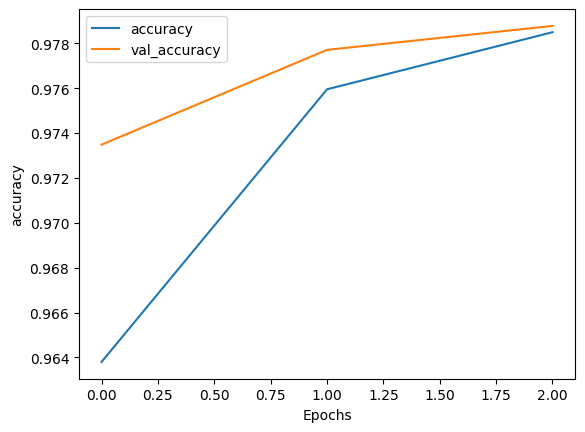

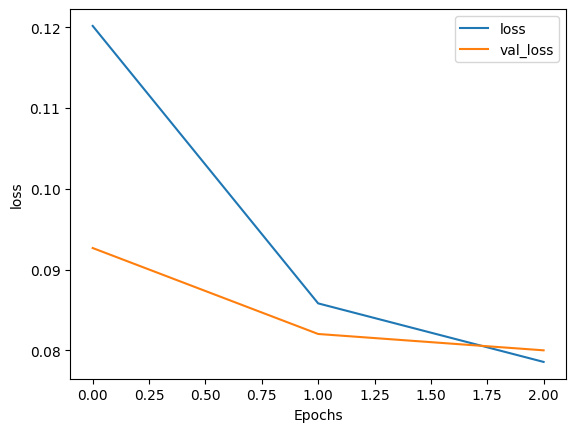

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
y_pred_probs = model.predict(test_padded)
y_pred_classes = y_pred_probs.argmax(axis=-1)

# Compute the evaluation metrics
from sklearn.metrics import classification_report
report = classification_report(test_labels, y_pred_classes)
print(report)

16888/16888 [==============================] - 30s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.96      0.97    137355
           1       0.99      0.99      0.99    188537
           2       0.97      0.98      0.98    214494

    accuracy                           0.98    540386
   macro avg       0.98      0.98      0.98    540386
weighted avg       0.98      0.98      0.98    540386



LSTM

In [ ]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk

In [ ]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(df['LemmatizeText'], df['Category_Column_LabelEncoded'], stratify = df['Category_Column_LabelEncoded'])


KeyError: ignored

In [ ]:
# Hyperparameters of the model
vocab_size = 3000 # choose based on statistics
oov_tok = ''
embedding_dim = 100
max_length = 200 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)


NameError: ignored

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional


In [ ]:
from keras.models import Sequential

In [ ]:
!pip install keras-metrics

In [ ]:
import tensorflow as tf
import keras_metrics as km

In [ ]:
# model initialization
model=Sequential()

model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(embedding_dim)))
model.add(Dense(3,activation='softmax'))


# model = keras.Sequential([
#     keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     keras.layers.Bidirectional(LSTM(embedding_dim)),
#     keras.layers(Dropout=0.5)
#     # keras.layers.Dense(24, activation='relu'),
#     keras.layers.Dense(6, activation='softmax')
# ])
# compile model
# opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
# model.compile(
#     loss='sparse_categorical_crossentropy',
#     optimizer=opt,
#     metrics=['accuracy'],
# )

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


In [ ]:
num_epochs = 3
history = model.fit(train_padded, train_labels,
                    epochs=num_epochs, verbose=1,
                    validation_split=0.1)




In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
y_pred_probs = model.predict(test_padded)
y_pred_classes = y_pred_probs.argmax(axis=-1)

# Compute the evaluation metrics
from sklearn.metrics import classification_report
report = classification_report(test_labels, y_pred_classes)
print(report)

Random Forest

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
rf_classifier.fit(X_train, y_train)

# Predict sentiment labels on the test data
y_pred = rf_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)